In [258]:
#1.Import the necessary libraries.
import pymysql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
!pip install imblearn
! npm install snake-case


zsh:1: command not found: npm


In [259]:
#2.Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df


customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')


In [260]:
#3.First look at its main features (head, shape, info).

customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [261]:
customer_df.shape

(9134, 24)

In [262]:
#4.Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
    
customer_df.columns= list(map(lambda x: x.lower(),customer_df.columns))


In [263]:
customer_df.columns = list(map(lambda x: x.replace(" ","_"),customer_df.columns))
customer_df.columns 

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [264]:
#5.Change effective to date column to datetime format.

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'],errors='coerce')

In [265]:
#6.Create a new dataframe using only the numerical data called numerical_df. Use this for the following questions.
numerical_df = customer_df.select_dtypes(include = np.number)


In [266]:
numerical_df.dtypes 

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [267]:
#7.Define a function that differentiates between continuous and discrete variables.
# Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

def variables_diff(col):
        if col.dtype == int:
             return "discrete"
        else:
            return "continuous"  
    

In [268]:
numerical_df.apply(variables_diff, axis=0)

customer_lifetime_value          continuous
income                             discrete
monthly_premium_auto               discrete
months_since_last_claim            discrete
months_since_policy_inception      discrete
number_of_open_complaints          discrete
number_of_policies                 discrete
total_claim_amount               continuous
dtype: object

In [269]:
continuous_df = numerical_df.select_dtypes(include = float)
discreet_df = numerical_df.select_dtypes(include = int)

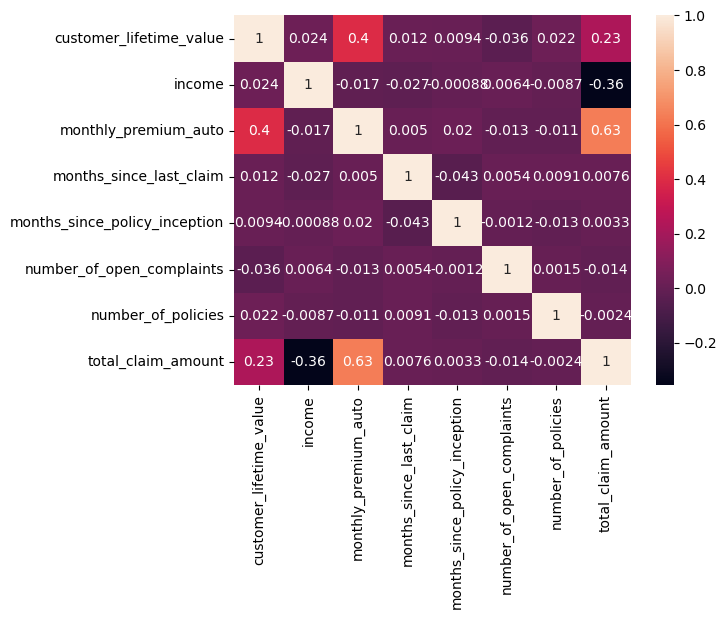

In [270]:
#8.Plot a correlation matrix, comment what you see.

sns.heatmap(numerical_df.corr(),annot=True)
plt.show()

#Monthly premium auto and total claim amount are the highest correlated variables having a strong correlation
# The rest of the matrix is pretty ok to move foward, there's no high correlated variables 

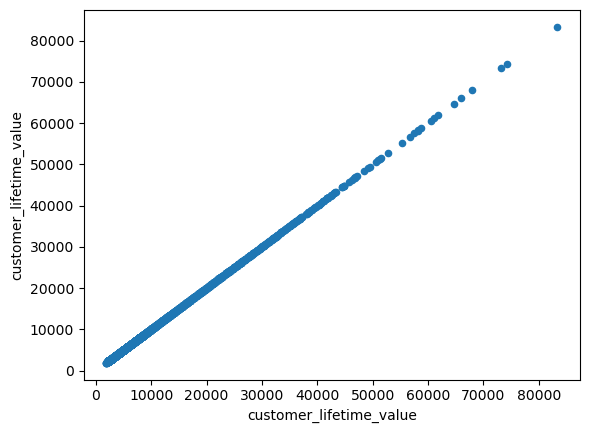

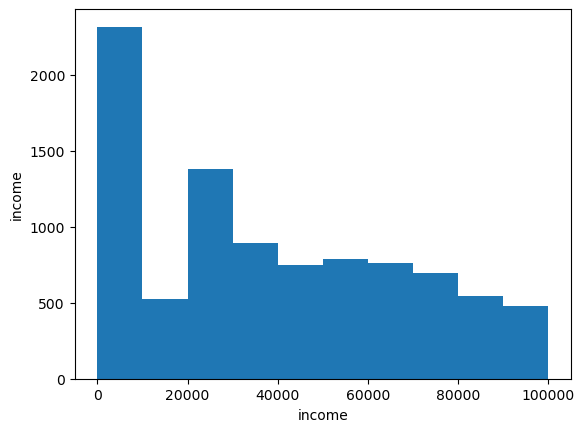

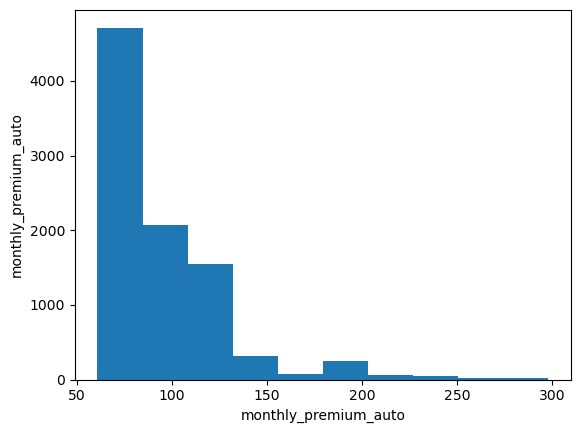

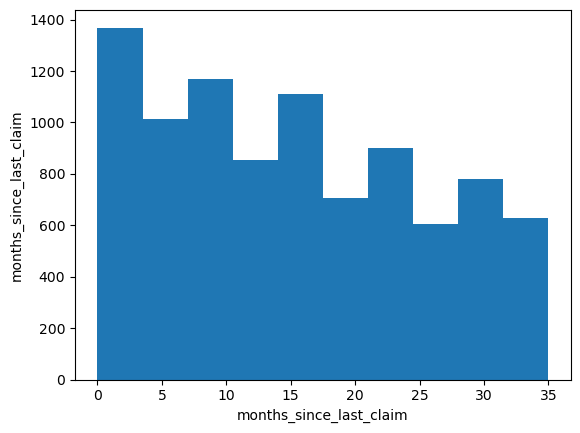

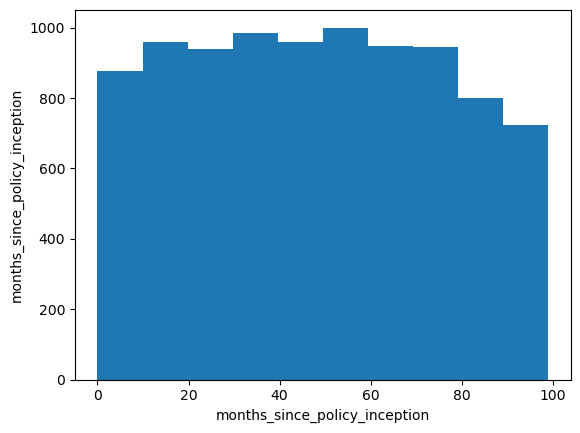

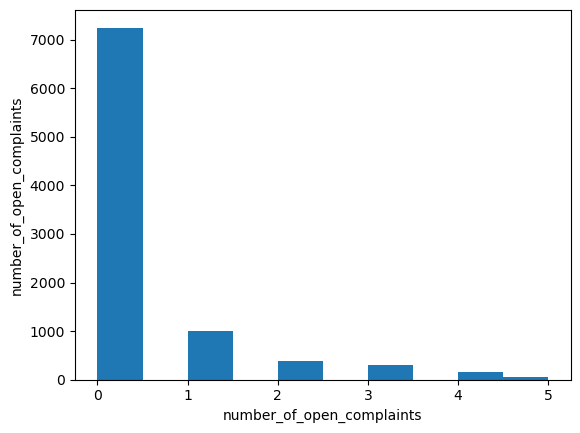

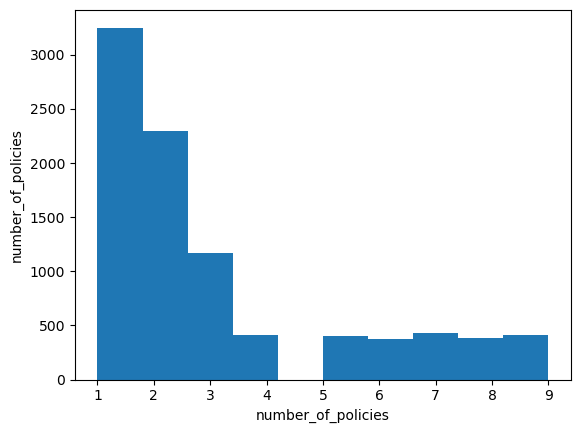

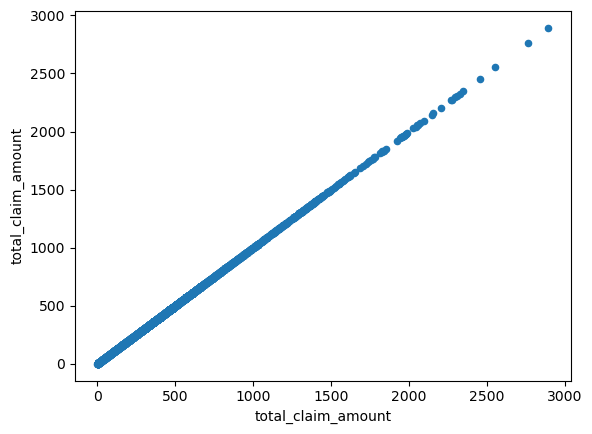

In [271]:
#9.Create a function to plot every discrete variable. 
#Do the same with the continuous variables 
#(Be Careful, you may need to change the plot type to one better suited for continuous data!)


for column in numerical_df.columns:
    if numerical_df[column].dtype == int:
        numerical_df[column].plot.hist()
        plt.xlabel(column)
        plt.ylabel(column)
        plt.show()
    else:
        numerical_df.plot.scatter(x=column, y=column)
        plt.xlabel(column)
        plt.ylabel(column)
        plt.show()

In [272]:
#10.Comment what you can see in the plots.

# it's possible to understand outliers on the total_claim_amount column and on customer_lifetime_value.
# The rest of the columns doesn't have a normal distribution

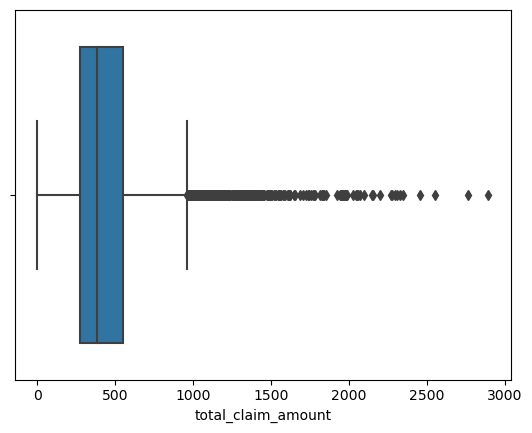

In [273]:
#11.Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
sns.boxplot(x='total_claim_amount',data=continuous_df)
plt.show()



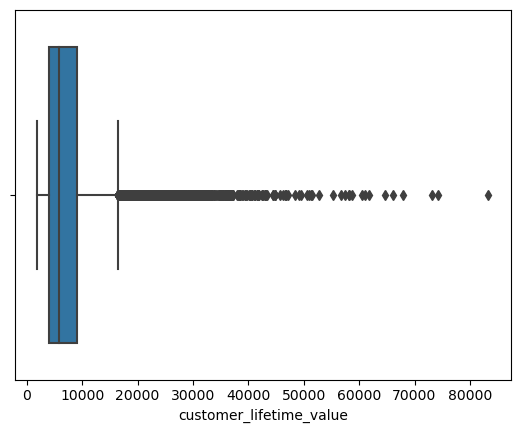

In [274]:
sns.boxplot(x='customer_lifetime_value',data=continuous_df)
plt.show()


In [275]:
#12.Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now.


In [276]:
iqr = np.percentile(continuous_df['total_claim_amount'],75) - np.percentile(continuous_df['total_claim_amount'],25) 
iqr

275.25659425

In [277]:
upper_limit = np.percentile(continuous_df['total_claim_amount'],75) + 1.5*iqr
upper_limit 

960.3997301249999

In [278]:
lower_limit = np.percentile(continuous_df['total_claim_amount'],25) - 1.5*iqr
lower_limit 

-140.62664687499995

In [279]:
continuous_df=continuous_df[continuous_df['total_claim_amount'] < upper_limit]

continuous_df['total_claim_amount']


0       384.811147
2       566.472247
3       529.881344
4       138.130879
5       159.383042
           ...    
9129    198.234764
9130    379.200000
9131    790.784983
9132    691.200000
9133    369.600000
Name: total_claim_amount, Length: 8681, dtype: float64

In [284]:
continuous_df['customer_lifetime_value']

0        2763.519279
2       12887.431650
3        7645.861827
4        2813.692575
5        8256.297800
            ...     
9129    23405.987980
9130     3096.511217
9131     8163.890428
9132     7524.442436
9133     2611.836866
Name: customer_lifetime_value, Length: 8681, dtype: float64

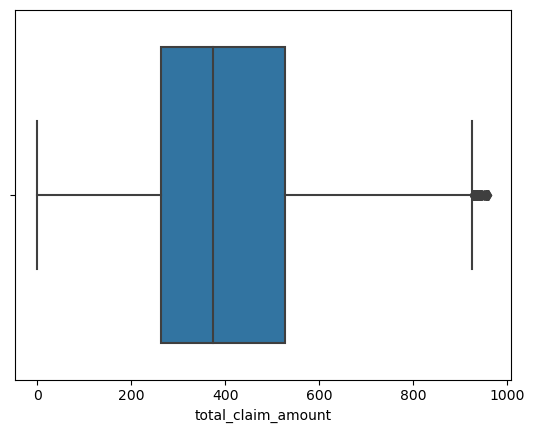

In [296]:
sns.boxplot(x='total_claim_amount',data=continuous_df)
plt.show()


In [285]:
iqr2 = np.percentile(continuous_df['customer_lifetime_value'],75) - np.percentile(continuous_df['customer_lifetime_value'],25) 
iqr2

4803.405419

In [290]:
upper_limit = np.percentile(continuous_df['customer_lifetime_value'],75) + 1.5*iqr2
upper_limit 

14649.9851545

In [291]:
lower_limit = np.percentile(continuous_df['customer_lifetime_value'],25) - 1.5*iqr2
lower_limit 

-2431.808065

In [292]:
continuous_df=continuous_df[continuous_df['customer_lifetime_value'] < upper_limit]
continuous_df=continuous_df[continuous_df['customer_lifetime_value'] > lower_limit]


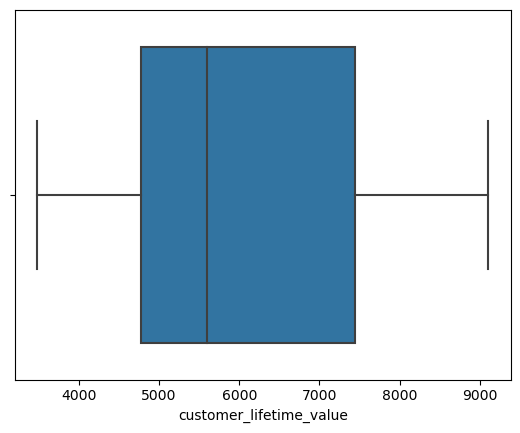

In [295]:
sns.boxplot(x='customer_lifetime_value',data=continuous_df)
plt.show()

In [297]:
#13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.
numerical_df.isna().sum()


customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [298]:
#14.Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [299]:
numerical_df.to_csv('numerical_df.csv')